In [741]:
import cv2
import numpy as np
from datetime import datetime

In [742]:
modelcfg="cfg/yolov4.cfg"
weight="Model/yolov4-custom_best.weights"
net=cv2.dnn.readNetFromDarknet(modelcfg,weight)
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
classes = None
classes_file = "data/obj.names"
with open(classes_file, 'r') as f:
    classes = [line.strip() for line in f.readlines()]
    
## Green or red
colors=[(0, 255, 0),(0, 0, 255)]

In [743]:
img="static/none.jpg"
# img="static/demo.png"
image=cv2.imread(img)
(iH, iW) = image.shape[:2]

In [744]:
print(f"{datetime.now().strftime('%d/%m/%Y %H:%M:%S.%f')}")
blob = cv2.dnn.blobFromImage(image,1 / 255.0,(416, 416),swapRB=True, crop=False)
print(f"{datetime.now().strftime('%d/%m/%Y %H:%M:%S.%f')}")

19/10/2022 18:08:46.844454
19/10/2022 18:08:46.849872


In [745]:
net.setInput(blob)
outs = net.forward(output_layers)

In [746]:
class_ids = []
confidences = []
boxes = []
class_ids = []

In [747]:
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.7:
            center_x = int(detection[0] * iW)
            center_y = int(detection[1] * iH)
            w = int(detection[2] * iW)
            h = int(detection[3] * iH)
            x = center_x - w / 2
            y = center_y - h / 2
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])

In [748]:
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [749]:
def draw_bounding_box(img, class_id, confidence, x, y, x_plus_w, y_plus_h):
    label = str(classes[class_id])+" ("+ str(round(confidence*100,2)) +"%)"
    cv2.rectangle(img, (x, y), (x_plus_w, y_plus_h), colors[class_id], 2)
    cv2.putText(img, label, (x-10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, colors[class_id], 2)

print(f"{datetime.now().strftime('%d/%m/%Y %H:%M:%S.%f')}")

19/10/2022 18:08:48.865293


In [750]:
for i in indices:
    box = boxes[i]
    x = box[0]
    y = box[1]
    w = box[2]
    h = box[3]
    ### draw box
    draw_bounding_box(image, class_ids[i], confidences[i], round(x), round(y), round(x + w), round(y + h))

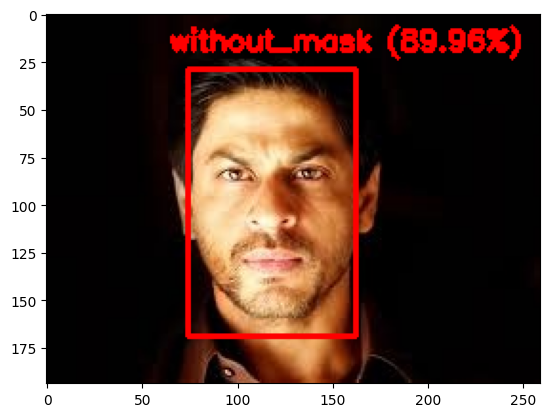

In [751]:
import matplotlib.pyplot as plt
output = plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()